In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

df = pd.read_csv('/content/drive/MyDrive/Project-CGPAvsConfidence-Regression/data.csv')

print(df.head())




    ID  Confidence(20)   CGPA  Attendence   Participation  \
0  1.0            15.8  7.250         18.0            7.8   
1  2.0            15.4  7.750         18.0            6.7   
2  3.0            16.1  7.375         19.0            7.1   
3  4.0            16.6  8.250         20.0            7.7   
4  5.0            16.0  7.000         18.0            6.8   

  Educational Background  Unnamed: 6  
0                   Arts         1.0  
1               Commerce         2.0  
2                Science         3.0  
3               Commerce         2.0  
4               Commerce         2.0  


#3. Find correlation between Confidence and CGPA


In [ ]:
cor_conf_cgpa = df["Confidence(20)"].corr(df["CGPA"])
print("\nCorrelation (Confidence(20) vs CGPA):", cor_conf_cgpa)



Correlation (Confidence(20) vs CGPA): -0.04759146178064717


#3. Scatter plot for relation mapping

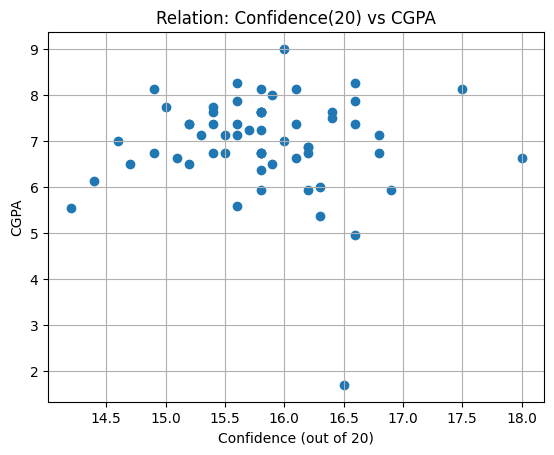

In [ ]:
plt.figure()
plt.scatter(df["Confidence(20)"], df["CGPA"])
plt.title("Relation: Confidence(20) vs CGPA")
plt.xlabel("Confidence (out of 20)")
plt.ylabel("CGPA")
plt.grid(True)
plt.show()

#The Corelation of -0.04 is almost close to zero shows no co relation between CGPA and Confidence

#3. Co-relation between Participation and CGPA( Strongest corelation among variables)

In [ ]:
cor_conf_cgpa = df["Participation"].corr(df["CGPA"])
print("\nCorrelation (Participation  vs CGPA):", cor_conf_cgpa)


Correlation (Participation  vs CGPA): 0.18903228297709476


#4. Rate of change of CGPA with respect to Confidence

In [ ]:
df["dCGPA_dConfidence"] = np.gradient(df["CGPA"], df["Confidence(20)"])

print("\nRate of change (first 10 values):")
print(df["dCGPA_dConfidence"].head(10))


Rate of change (first 10 values):
0   -1.250000
1   -2.202381
2    0.797619
3    0.083333
4    0.520833
5    2.239583
6    0.625000
7    0.104167
8   -0.729167
9   -1.750000
Name: dCGPA_dConfidence, dtype: float64


/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:1245: RuntimeWarning: divide by zero encountered in divide
  a = -(dx2)/(dx1 * (dx1 + dx2))
/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:1246: RuntimeWarning: divide by zero encountered in divide
  b = (dx2 - dx1) / (dx1 * dx2)
/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:1247: RuntimeWarning: divide by zero encountered in divide
  c = dx1 / (dx2 * (dx1 + dx2))
/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:1253: RuntimeWarning: invalid value encountered in add
  out[tuple(slice1)] = a * f[tuple(slice2)] + b * f[tuple(slice3)] + c * f[tuple(slice4)]


# Plot derivative curve


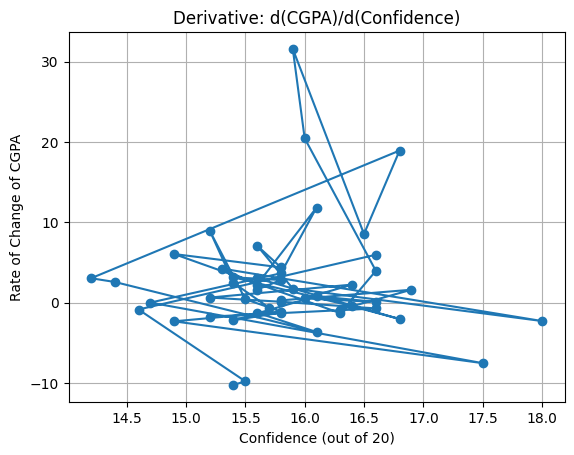

In [ ]:
plt.figure()
plt.plot(df["Confidence(20)"], df["dCGPA_dConfidence"], marker='o')
plt.title("Derivative: d(CGPA)/d(Confidence)")
plt.xlabel("Confidence (out of 20)")
plt.ylabel("Rate of Change of CGPA")
plt.grid(True)
plt.show()

#4. Linear Regression (CGPA ~ Participation)

In [ ]:
df_cleaned = df.dropna(subset=['Participation', 'CGPA'])
X = df_cleaned[['Participation']].values
y = df_cleaned[['CGPA']].values
reg = LinearRegression().fit(X, y)

slope = reg.coef_[0][0]
intercept = reg.intercept_[0]
r2 = reg.score(X, y)

print(f"\nLinear Model (CGPA = a + b * Participation):")
print(f"  CGPA = {intercept:.4f} + {slope:.4f} * Participation")
print(f"  R^2 = {r2:.4f}")


Linear Model (CGPA = a + b * Participation):
  CGPA = 4.3835 + 0.3515 * Participation
  R^2 = 0.0357


# SCATTER + REGRESSION LINE


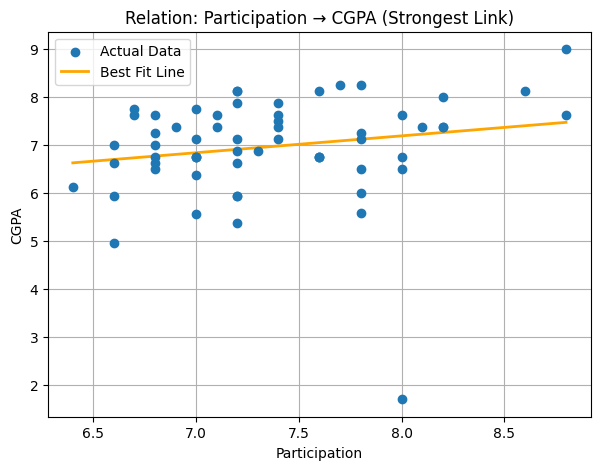

In [ ]:
plt.figure(figsize=(7,5))
plt.scatter(df['Participation'], df['CGPA'], label="Actual Data", zorder=3)
xs = np.linspace(df['Participation'].min(), df['Participation'].max(), 200)
ys = intercept + slope * xs
plt.plot(xs, ys, color="orange", label="Best Fit Line", linewidth=2)
plt.xlabel("Participation")
plt.ylabel("CGPA")
plt.title("Relation: Participation → CGPA (Strongest Link)")
plt.grid(True)
plt.legend()
plt.show()

# 4. DERIVATIVE (Rate of change of CGPA w.r.t Participation)


/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:1245: RuntimeWarning: divide by zero encountered in divide
  a = -(dx2)/(dx1 * (dx1 + dx2))
/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:1245: RuntimeWarning: invalid value encountered in divide
  a = -(dx2)/(dx1 * (dx1 + dx2))
/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:1246: RuntimeWarning: divide by zero encountered in divide
  b = (dx2 - dx1) / (dx1 * dx2)
/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:1246: RuntimeWarning: invalid value encountered in divide
  b = (dx2 - dx1) / (dx1 * dx2)
/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:1247: RuntimeWarning: divide by zero encountered in divide
  c = dx1 / (dx2 * (dx1 + dx2))
/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:1247: RuntimeWarning: invalid value encountered in divide
  c = dx1 / (dx2 * (dx1 + dx2))
/usr/local/lib/py

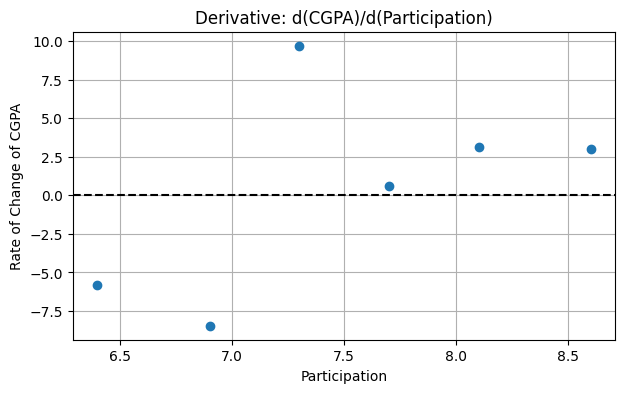

In [ ]:
df_sorted = df.sort_values(by='Participation').reset_index(drop=True)

# Numerical derivative: d(CGPA)/d(Participation)
df_sorted["dCGPA_dParticipation"] = np.gradient(
    df_sorted['CGPA'].values,
    df_sorted['Participation'].values
)

plt.figure(figsize=(7,4))
plt.plot(
    df_sorted['Participation'],
    df_sorted["dCGPA_dParticipation"],
    marker='o'
)
plt.axhline(0, color='black', linestyle='--')
plt.xlabel("Participation")
plt.ylabel("Rate of Change of CGPA")
plt.title("Derivative: d(CGPA)/d(Participation)")
plt.grid(True)
plt.show()

# 5. INTEGRATION (Cumulative Effect)
#Cumulative ∫ CGPA d(Participation)

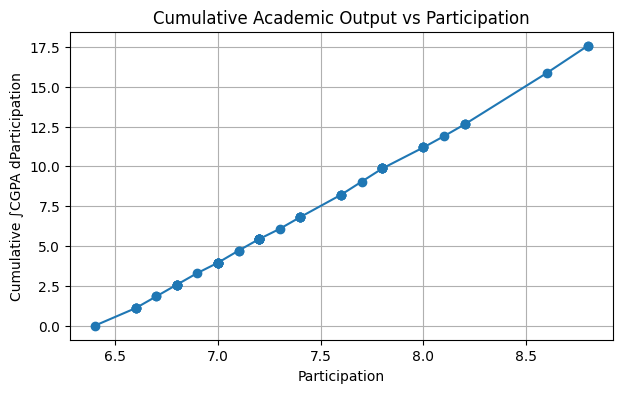

In [ ]:
x = df_sorted['Participation'].values
y = df_sorted['CGPA'].values

cumulative_area = np.zeros(len(x))
for i in range(1, len(x)):
    cumulative_area[i] = cumulative_area[i-1] + np.trapezoid(
        y[i-1:i+1], x[i-1:i+1]
    )

df_sorted["Cumulative_Performance"] = cumulative_area

plt.figure(figsize=(7,4))
plt.plot(df_sorted['Participation'], df_sorted["Cumulative_Performance"], marker='o')
plt.xlabel("Participation")
plt.ylabel("Cumulative ∫CGPA dParticipation")
plt.title("Cumulative Academic Output vs Participation")
plt.grid(True)
plt.show()

In [ ]:
df_sorted.to_csv("processed_output.csv", index=False)
print("\nProcessed data saved as processed_output.csv")


Processed data saved as processed_output.csv
